In [1]:
import numpy as np

import sys
sys.path.append('../')

from src import visualization

# Data Exploring

## Đọc dữ liệu, thông tin về kích thước dữ liệu, tên các cột

In [2]:
data = np.genfromtxt('../data/raw/BankChurners.csv', delimiter=',',
                     encoding='utf8', dtype=str)
data = np.array([[cell.replace('"', '') for cell in row] for row in data])
header = data[0]
data = data[1:]
print("Columns name:")
for i, h in enumerate(header):
    print(f'[{i}] {h}')

Columns name:
[0] CLIENTNUM
[1] Attrition_Flag
[2] Customer_Age
[3] Gender
[4] Dependent_count
[5] Education_Level
[6] Marital_Status
[7] Income_Category
[8] Card_Category
[9] Months_on_book
[10] Total_Relationship_Count
[11] Months_Inactive_12_mon
[12] Contacts_Count_12_mon
[13] Credit_Limit
[14] Total_Revolving_Bal
[15] Avg_Open_To_Buy
[16] Total_Amt_Chng_Q4_Q1
[17] Total_Trans_Amt
[18] Total_Trans_Ct
[19] Total_Ct_Chng_Q4_Q1
[20] Avg_Utilization_Ratio
[21] Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
[22] Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [3]:
print("Number of row: ", len(data))
print("Number of colum:", len(header))
print("First 5 rows: ")
print(data[:5])

Number of row:  10127
Number of colum: 23
First 5 rows: 
[['768805383' 'Existing Customer' '45' 'M' '3' 'High School' 'Married'
  '$60K - $80K' 'Blue' '39' '5' '1' '3' '12691' '777' '11914' '1.335'
  '1144' '42' '1.625' '0.061' '9.3448e-05' '0.99991']
 ['818770008' 'Existing Customer' '49' 'F' '5' 'Graduate' 'Single'
  'Less than $40K' 'Blue' '44' '6' '1' '2' '8256' '864' '7392' '1.541'
  '1291' '33' '3.714' '0.105' '5.6861e-05' '0.99994']
 ['713982108' 'Existing Customer' '51' 'M' '3' 'Graduate' 'Married'
  '$80K - $120K' 'Blue' '36' '4' '1' '0' '3418' '0' '3418' '2.594' '1887'
  '20' '2.333' '0' '2.1081e-05' '0.99998']
 ['769911858' 'Existing Customer' '40' 'F' '4' 'High School' 'Unknown'
  'Less than $40K' 'Blue' '34' '3' '4' '1' '3313' '2517' '796' '1.405'
  '1171' '20' '2.333' '0.76' '0.00013366' '0.99987']
 ['709106358' 'Existing Customer' '40' 'M' '3' 'Uneducated' 'Married'
  '$60K - $80K' 'Blue' '21' '5' '1' '0' '4716' '0' '4716' '2.175' '816'
  '28' '2.5' '0' '2.1676e-05' '0.9

## Kiểm tra dữ liệu các cột chữ.

In [4]:
print(f"Attrition Flag: {np.unique(data[:, 1])}")

print(f"Gender: {np.unique(data[:, 3])}")

print(f"Education Level: {np.unique(data[:, 5])}")

print(f"Marital_Status: {np.unique(data[:, 6])}")

print(f"Income Category: {np.unique(data[:, 7])}")

print(f"Card Category: {np.unique(data[:, 8])}")

Attrition Flag: ['Attrited Customer' 'Existing Customer']
Gender: ['F' 'M']
Education Level: ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status: ['Divorced' 'Married' 'Single' 'Unknown']
Income Category: ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Card Category: ['Blue' 'Gold' 'Platinum' 'Silver']


## Kiểm tra dữ liệu các cột số.

In [5]:
customer_age = data[:,2].astype(int)
dependent_count = data[:,4].astype(int)

print(f"Customer Age: {customer_age.min()} - {customer_age.max()}")

print(f"Dependent Count: {dependent_count.min()} - {dependent_count.max()}")

for i, name_col in enumerate(header[9:]):
    value = data[:, i + 9].astype(float)
    print(f'{name_col.replace("_", " ")}: {value.min():.2f} - {value.max():.2f}')

Customer Age: 26 - 73
Dependent Count: 0 - 5
Months on book: 13.00 - 56.00
Total Relationship Count: 1.00 - 6.00
Months Inactive 12 mon: 0.00 - 6.00
Contacts Count 12 mon: 0.00 - 6.00
Credit Limit: 1438.30 - 34516.00
Total Revolving Bal: 0.00 - 2517.00
Avg Open To Buy: 3.00 - 34516.00
Total Amt Chng Q4 Q1: 0.00 - 3.40
Total Trans Amt: 510.00 - 18484.00
Total Trans Ct: 10.00 - 139.00
Total Ct Chng Q4 Q1: 0.00 - 3.71
Avg Utilization Ratio: 0.00 - 1.00
Naive Bayes Classifier Attrition Flag Card Category Contacts Count 12 mon Dependent count Education Level Months Inactive 12 mon 1: 0.00 - 1.00
Naive Bayes Classifier Attrition Flag Card Category Contacts Count 12 mon Dependent count Education Level Months Inactive 12 mon 2: 0.00 - 1.00


## Kiểm tra missing value.

In [6]:
print(f"Missing Value: {sum(data[data == ''])}") # data dtype is string 

Missing Value: 0


## Kiểm tra dữ liệu trùng lặp trên cột `CLIENTNUM`

In [16]:
is_dupicate = False
customer_ID = data[:, 0]
if (len(np.unique(customer_ID)) < len(customer_ID)):
    is_dupicate = True
print("Is Duplicate: ", is_dupicate)

Is Duplicate:  False


# Visualization

**Câu hỏi 1: Tỷ lệ khách hàng rời bỏ là bao nhiêu?**  
Đây là câu hỏi cơ bản nhất để hiểu mức độ nghiêm trọng của vấn đeef.
Ngoaif ra dieu nay để biết liệu dữ liệu có bị mất cân bằng hay không.

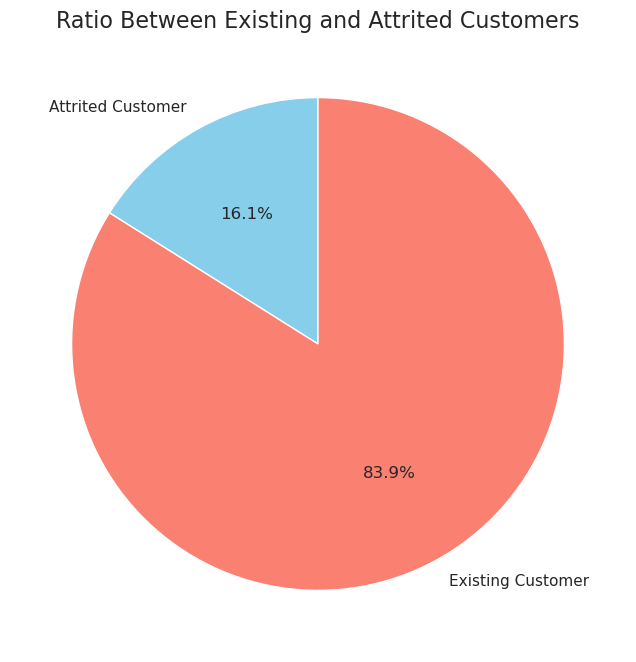

In [7]:
attrition_flag_data = data[:, 1]
visualization.plot_attrition_pie_chart(attrition_flag_data)

Biểu đồ cho thấy một tỷ lệ rời bỏ khách hàng là 16.1%, một con số đáng báo động, cho thấy sự cần thiết phải phân tích sâu hơn để tìm ra nguyên nhân và xây dựng chiến lược giữ chân khách hàng. Đồng thời, nó cũng chỉ ra rằng bộ dữ liệu bị mất cân bằng, đây là một yếu tố kỹ thuật quan trọng cần được xử lý trong giai đoạn xây dựng mô hình.

**Câu hỏi 2: Phân phối độ tuổi của khách hàng rời bỏ và khách hàng hiện tại có khác nhau không?**  
Câu hỏi này giúp tìm hiểu xem liệu có nhóm tuổi nào có xu hướng rời bỏ cao hơn không.  


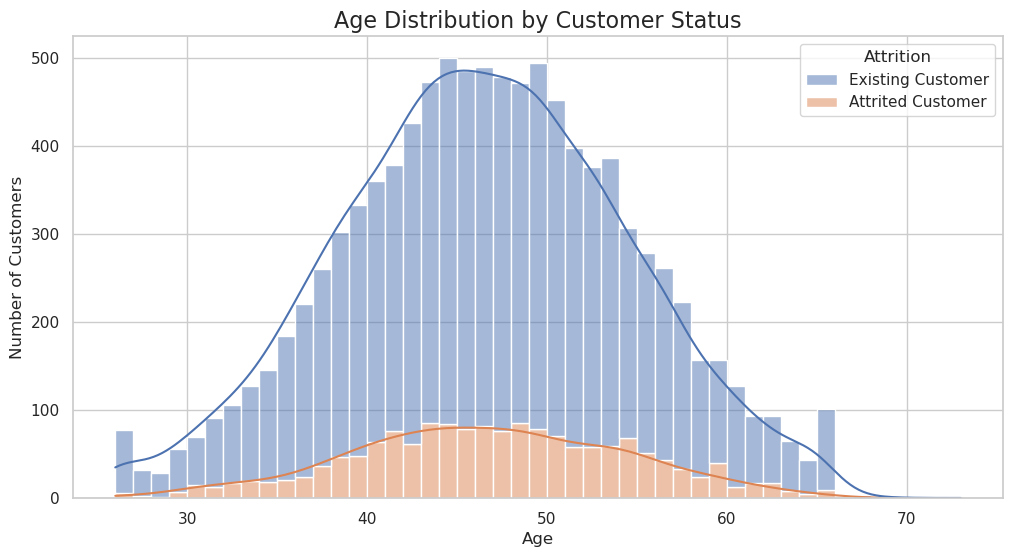

In [12]:
customer_age = data[:, 2].astype(int)
attrition_flag_data = data[:, 1]
visualization.plot_age_distribution(customer_age, attrition_flag_data)

Biểu đồ phân phối tuổi cho thấy rằng không có sự khác biệt đáng kể về mặt cấu trúc độ tuổi giữa nhóm khách hàng hiện tại và nhóm khách hàng đã rời bỏ. Cả hai nhóm đều tập trung ở độ tuổi trung niên. Điều này dẫn đến một kết luận quan trọng: độ tuổi không phải là một yếu tố dự báo mạnh cho việc khách hàng sẽ rời bỏ dịch vụ. Do đó, nên tập trung vào các biến số khác để tìm ra nguyên nhân thực sự.

**Câu hỏi 3: Hạn mức tín dụng (Credit_Limit) có ảnh hưởng đến việc khách hàng rời bỏ không?**  
Những khách hàng có hạn mức tín dụng cao/thấp có dễ rời bỏ hơn không?

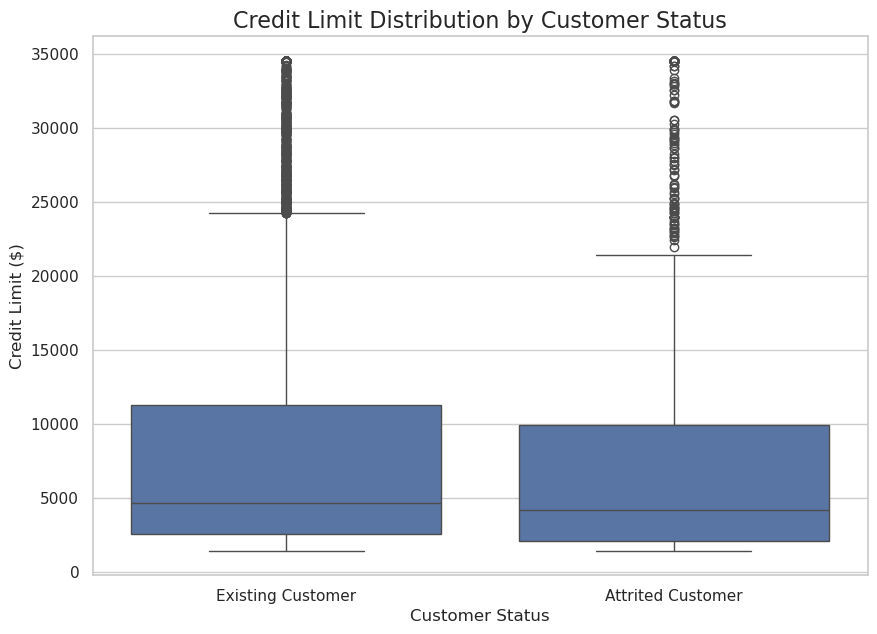

In [13]:
credit_limit_data = data[:, 13].astype(float)
attrition_flag_data = data[:, 1]
visualization.plot_credit_limit_boxplot(attrition_flag_data, credit_limit_data)

Hạn mức tín dụng không phải là yếu tố phân biệt rõ rệt giữa khách hàng ở lại và rời đi, vì phân phối của hai nhóm rất giống nhau. Tuy nhiên, một điểm đáng chú ý là những khách hàng có hạn mức rất cao (VIP) hầu hết đều là khách hàng hiện tại, cho thấy nhóm cao cấp này có tỷ lệ rời bỏ thấp hơn.

**Câu hỏi 4: Mối quan hệ giữa Tổng số tiền giao dịch (Total_Trans_Amt) và Tổng số lượng giao dịch (Total_Trans_Ct) là gì?**  
Câu hỏi này giúp khám phá hành vi chi tiêu. Liệu nhóm khách hàng rời bỏ có cụm hành vi chi tiêu nào khác biệt không?

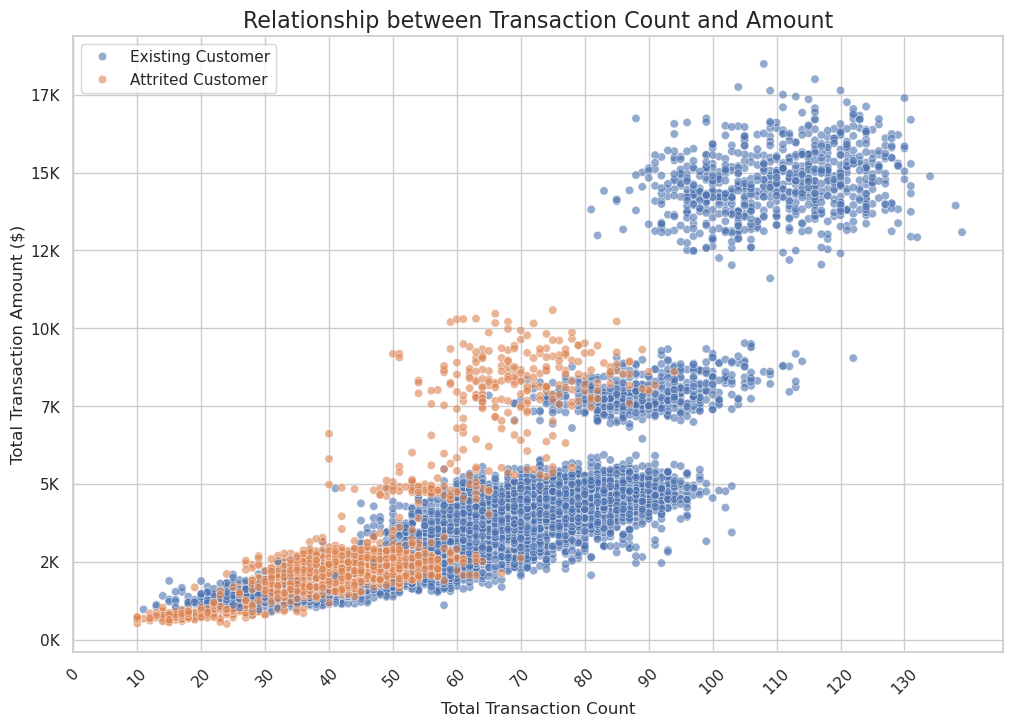

In [14]:
total_trans_ct_data = data[:, 18].astype(float)
total_trans_amt_data = data[:, 17].astype(float)
attrition_flag_data = data[:, 1]

visualization.plot_transaction_scatter(total_trans_ct_data, total_trans_amt_data, attrition_flag_data)

Biểu đồ  mang lại nhiều thông tin huu ich. Nó cho thấy một cách thuyết phục rằng khách hàng rời bỏ dịch vụ là những người có mức độ tương tác và chi tiêu thấp. 

**Câu hỏi 5: Các biến số có tương quan với nhau như thế nào?** 
Một cái nhìn tổng quan về mối quan hệ tuyến tính giữa tất cả các biến số.

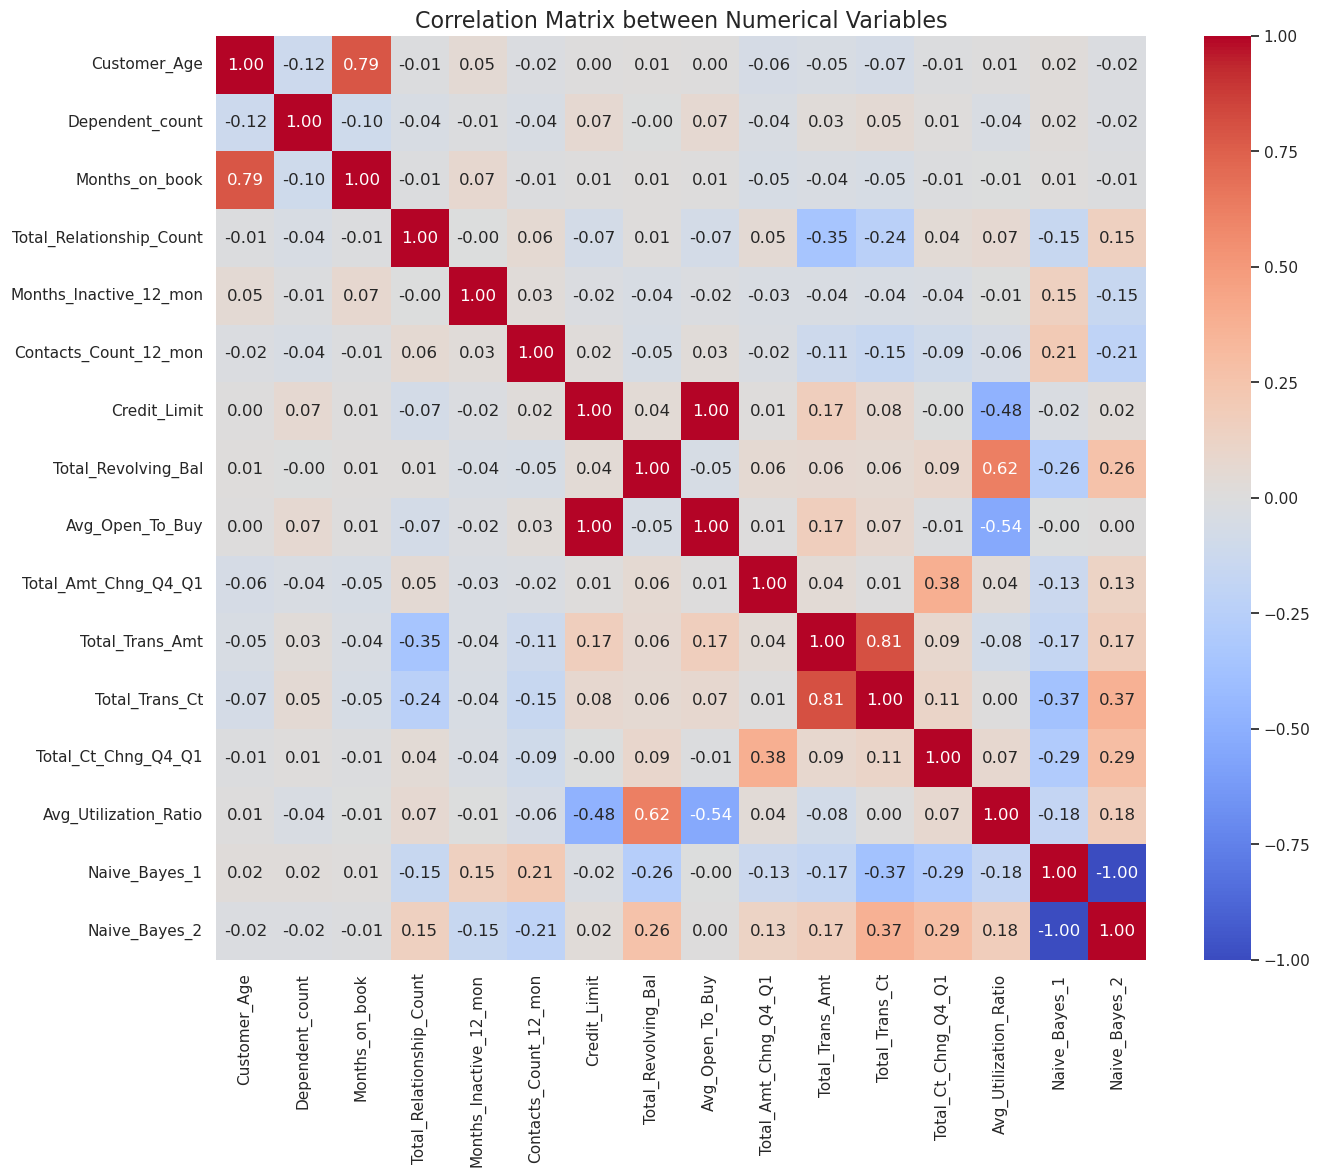

In [15]:
numeric_col_idx = [2, 4]
numeric_col_idx.extend(list(range(9, len(header))))
numerical_data = data[:, numeric_col_idx].astype(float)
numerical_header = [header[2], header[4]]
numerical_header.extend(header[9:])

numerical_header[-1] = 'Naive_Bayes_2'
numerical_header[-2] = 'Naive_Bayes_1'

visualization.plot_correlation_heatmap(numerical_data, numerical_header)


Một vài cặp có quan hệ tuyến tính mạnh như:  
- `Customer_Age` và `Months_on_book`
- `Total_Trans_Amt` và `Total_Trans_Ct`
- `Total_Revolving_Bal` và `Avg_Utilization_Ratio`
- `Avg_Open_To_Buy` và `Creadit_Limit`